# Tarefa - Árvore de Decisão (aula)

## Alunos
* Daniel La Rubia -- DRE: 115033904
* Victor Ribeiro Pires -- DRE: 113051532

Árvore de Decisão

Inicialmente são carregadas as bibliotecas necessárias: 

+ pandas (https://pandas.pydata.org/): biblioteca para análise de dados em python
+ scikit-learn (https://scikit-learn.org/stable/): biblioteca de ferramentas de aprendizagem de máquina em python

In [ ]:
# Carregando Bibliotecas
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Importa o classificador de árvore de decisão
from sklearn import metrics #Importa métrica para calcular acurácia - módulo do scikit-learn

Usaremos como base de dados o arquivo "exemplo_IA.csv" com os dados usados no exemplo da "aula 9 - video 3 - aprendizado de máquina.pdf".

In [ ]:
# Nome dos atributos
col_names = ['Outlook','Temperature','Humidity','Wind','PlayTennis']

# carregando a base de dados a ser usada
exemplo = pd.read_csv("exemplo_IA.csv", header=None, names=col_names)

In [ ]:
# podemos ver os primeiros elementos do arquivo
exemplo.head()

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [ ]:
# definir o conceito alvo e as features usadas

feature_cols = ['Outlook','Temperature','Humidity','Wind'] # features (atributos) que serão usadas no aprendizado

X = exemplo[feature_cols] # selecionamos as colunas correspondentes aos atributos que serão usados
y = exemplo.PlayTennis # conceito que queremos aprender. Selecionamos a coluna com a classificação das instâncias

Os dados do nosso exemplo são categóricos e o classificador de árvore de decisão do scikit não funciona para este tipo de dado. Precisamos preparar os dados antes construir nosso classificador. Para isso vamos usar a função do pandas "pd.get_dummies" que converte os atributos categóricos em atributos com valores 0 e 1.
Por exemplo, o atributo Humidity que pode receber os valores High e Normal, passa a ser representado pelos atributos Humidity_High e Humidity_Normal, que podem receber os valores 0 e 1.

In [ ]:
Xone_hot_data = pd.get_dummies(X[['Outlook','Temperature','Humidity','Wind']]) #transformando o dataset
Xone_hot_data.head()

,Outlook_Overcast,Outlook_Rain,Outlook_Sunny,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,Wind_Strong,Wind_Weak
0,0,0,1,0,1,0,1,0,0,1
1,0,0,1,0,1,0,1,0,1,0
2,1,0,0,0,1,0,1,0,0,1
3,0,1,0,0,0,1,1,0,0,1
4,0,1,0,1,0,0,0,1,0,1


Vamos criar agora o nosso classificador de árvore de decisão, usando como função para seleção do atributo a entropia:

In [ ]:
# Criação do classificador de árvore de decisão 
clf = DecisionTreeClassifier(criterion="entropy")

# Usamos o método fit para construir o classificador a partir do nosso conjunto de treinamento
clf = clf.fit(Xone_hot_data, y)

Podemos visualizar a árvore de decisão gerada usando o pacote graphviz:
https://graphviz.org/
https://pypi.org/project/graphviz/

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


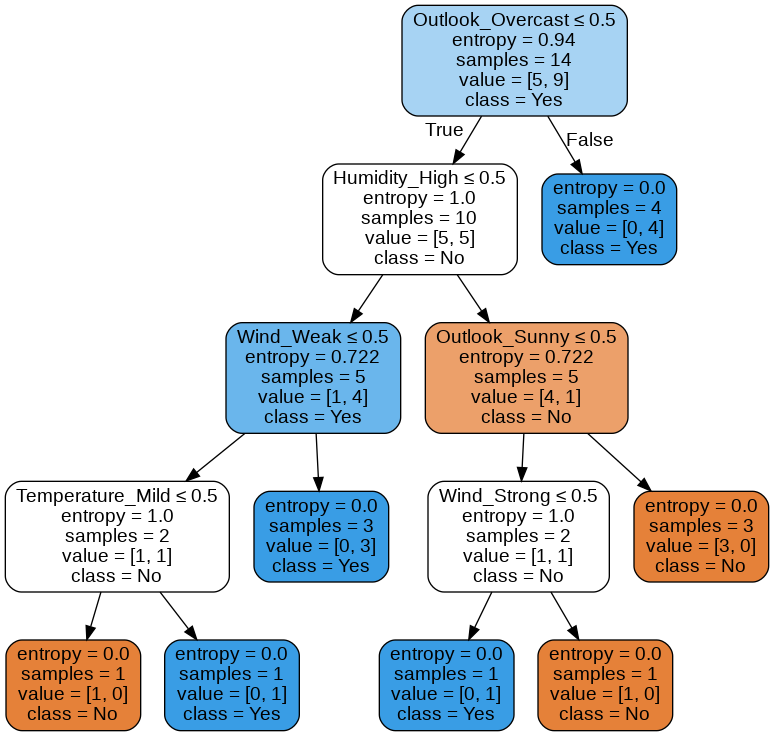

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

# tem que usar feature_names = one_hot_data.columns pois feature_names = feature_cols tem menos atributos
# pois o one-hot acrescenta mais
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = Xone_hot_data.columns,class_names=['No','Yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('arvore1.png')
Image(graph.create_png())

Podemos medir a acurácia testando quantas instâncias são classificadas corretamente. Observe que usamos todas as instâncias disponíveis no treinamento. A acurácia obtida foi 1, indicando que classificamos corretamente todos os exemplos de nosso conjunto.

In [ ]:
# Usando modelo para classificar os dados que temos a disposição
y_pred = clf.predict(Xone_hot_data)

# Medida de acuracia, que indica quantas instâncias são corretamente classificadas
print("Accuracy:",metrics.accuracy_score(y, y_pred))

Accuracy: 1.0


No programa feito em aula, usamos todos os exemplos para treinar o classificador de árvore de decisão. Mas podemos dividir o conjunto de exemplos em conjuntos de treinamento e teste usando sklearn.model_selection.train_test_split.

a. Divida o conjunto de exemplos em treinamento e teste das seguintes formas:

i. 60% treinamento e 40% teste

ii. 80% treinamento e 20% teste

Em cada um dos casos, gere a árvore de decisão correspondente e indique qual a acurácia obtida no treinamento e no teste. Compare as árvores obtidas e comente
suas observações.

In [ ]:
    from sklearn.model_selection import train_test_split as train_test
X1_train, X1_test, y1_train, y1_test = train_test(Xone_hot_data, y, test_size=0.4, train_size=0.6, random_state=None, shuffle=True, stratify=None)
X2_train, X2_test, y2_train, y2_test= train_test(Xone_hot_data, y, test_size=0.2, train_size=0.8, random_state=None, shuffle=True, stratify=None)


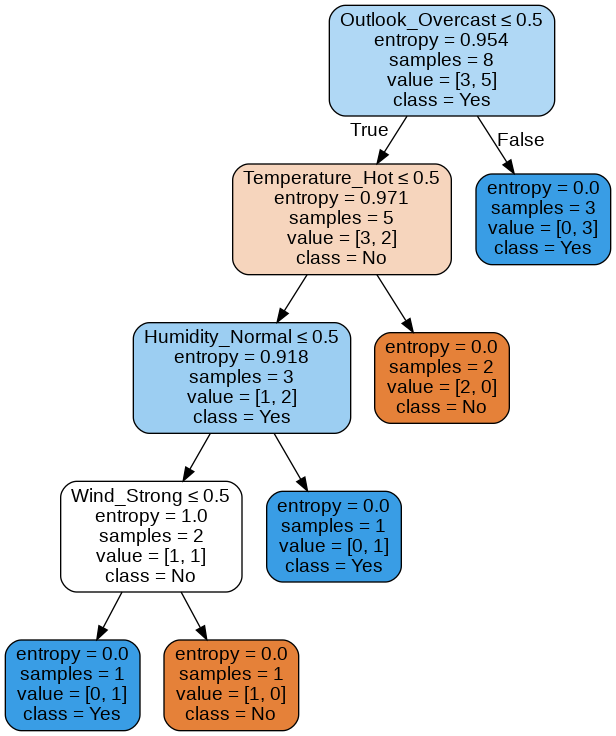

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(X1_train, y1_train)

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X1_train.columns,class_names=['No','Yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('arvore2.png')
Image(graph.create_png())




In [ ]:
y_pred = clf.predict(X1_train)
print("Accuracy:",metrics.accuracy_score(y1_train, y_pred))


Accuracy: 1.0


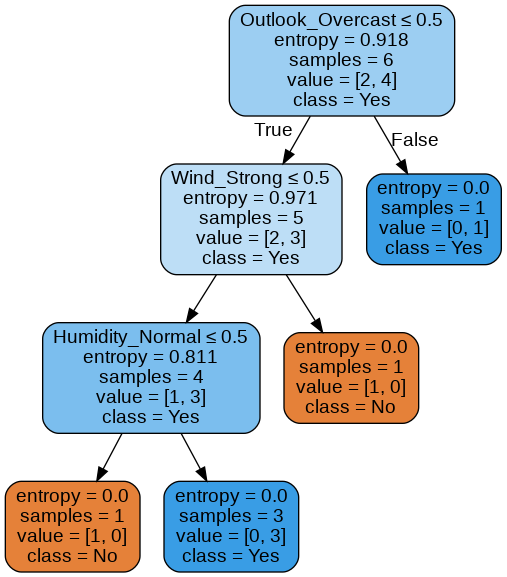

In [ ]:

clf = DecisionTreeClassifier(criterion="entropy")

clf = clf.fit(X1_test, y1_test)

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X1_test.columns,class_names=['No','Yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('arvore3.png')
Image(graph.create_png())


In [ ]:
y_pred = clf.predict(X1_test)

print("Accuracy:",metrics.accuracy_score(y1_test, y_pred))

Accuracy: 1.0


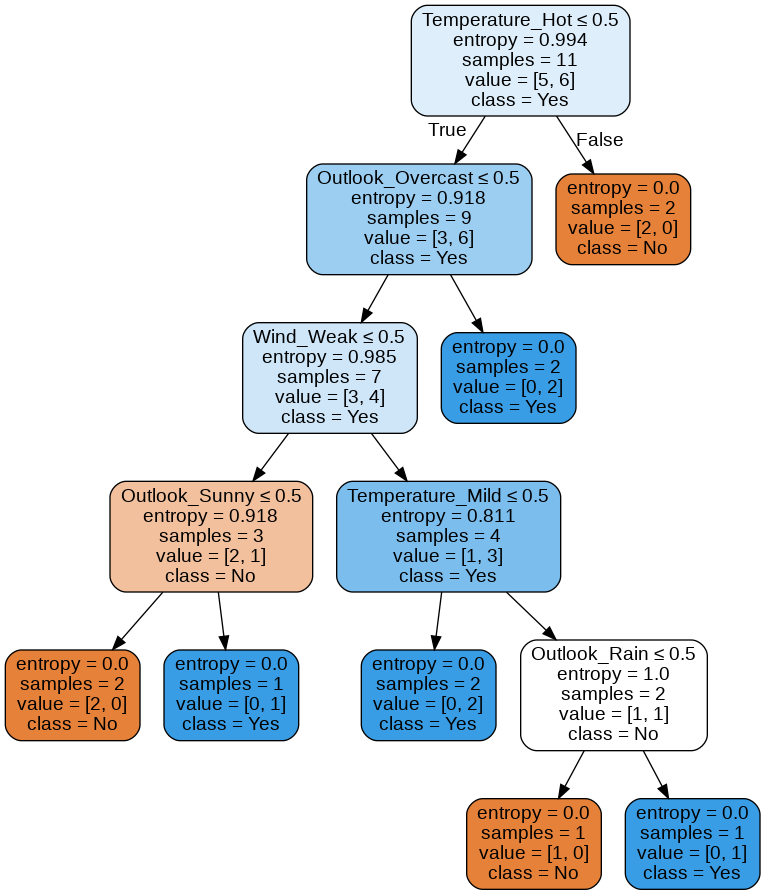

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy")

clf = clf.fit(X2_train, y2_train)

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X2_train.columns,class_names=['No','Yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('arvore4.png')
Image(graph.create_png())





In [ ]:
y_pred = clf.predict(X2_train)

print("Accuracy:",metrics.accuracy_score(y2_train, y_pred))

Accuracy: 1.0


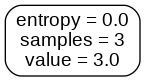

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(X2_test, y2_test)

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X2_test.columns,class_names=['No','Yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('arvore5.png')
Image(graph.create_png())

In [ ]:
y_pred = clf.predict(X2_test)

print("Accuracy:",metrics.accuracy_score(y2_test, y_pred))

Accuracy: 1.0


2. Utilizamos a entropia para escolher os atributos. Use o índice Gini
(https://medium.com/analytics-steps/understanding-the-gini-index-and-information-ga
in-in-decision-trees-ab4720518ba8) ao invés da entropia.Você deve repetir o
experimento considerando que o conjunto de exemplos não foi dividido em
treinamento e teste, e considerando as divisões do exercício anterior. Indique a
acurácia em cada caso (preencha a seguinte tabela).

Compare as árvores obtidas
quando usamos a entropia e o índice gini.

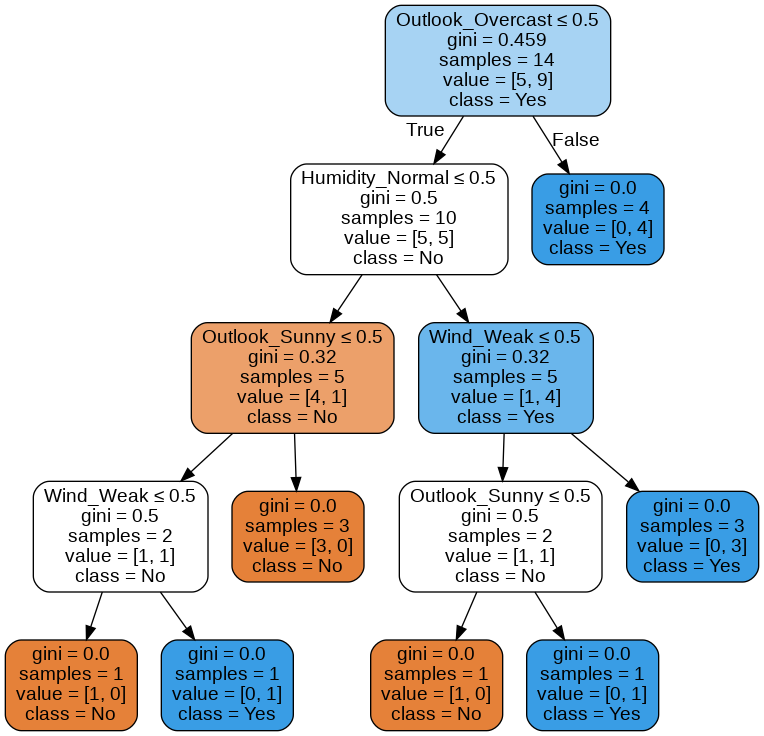

In [ ]:
clf = DecisionTreeClassifier(criterion="gini")

clf = clf.fit(Xone_hot_data, y)

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = Xone_hot_data.columns,class_names=['No','Yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('arvore7.png')
Image(graph.create_png())

In [ ]:
y_pred = clf.predict(Xone_hot_data)

print("Accuracy:",metrics.accuracy_score(y, y_pred))

Accuracy: 1.0


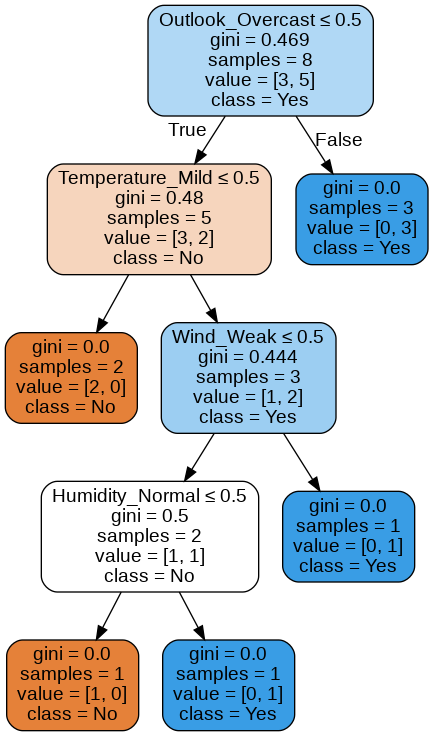

In [ ]:
clf = DecisionTreeClassifier(criterion="gini")

clf = clf.fit(X1_train, y1_train)

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X1_train.columns,class_names=['No','Yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('arvore8.png')
Image(graph.create_png())

In [ ]:
y_pred = clf.predict(X1_train)

print("Accuracy:",metrics.accuracy_score(y1_train, y_pred))

Accuracy: 1.0


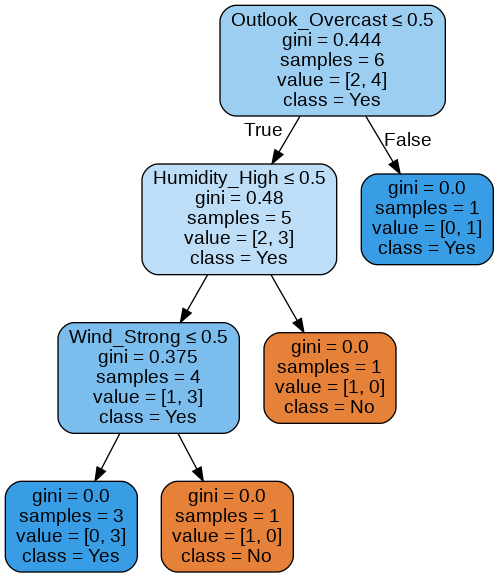

In [ ]:
clf = DecisionTreeClassifier(criterion="gini")

clf = clf.fit(X1_test, y1_test)

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X1_test.columns,class_names=['No','Yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('arvore9.png')
Image(graph.create_png())

In [ ]:
y_pred = clf.predict(X1_test)

print("Accuracy:",metrics.accuracy_score(y1_test, y_pred))

Accuracy: 1.0


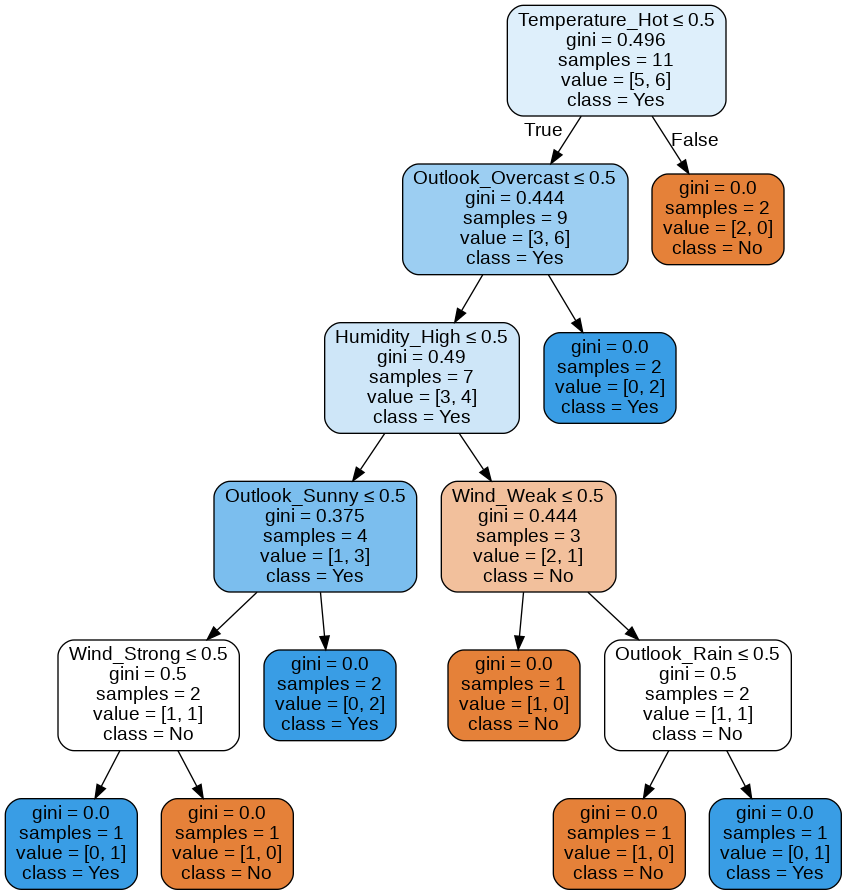

In [ ]:
clf = DecisionTreeClassifier(criterion="gini")

clf = clf.fit(X2_train, y2_train)

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X2_train.columns,class_names=['No','Yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('arvore10.png')
Image(graph.create_png())

In [ ]:
y_pred = clf.predict(X2_train)
print("Accuracy:",metrics.accuracy_score(y2_train, y_pred))

Accuracy: 1.0


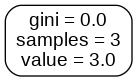

In [ ]:
clf = DecisionTreeClassifier(criterion="gini")
clf = clf.fit(X2_test, y2_test)

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X2_test.columns,class_names=['No','Yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('arvore11.png')
Image(graph.create_png())

In [ ]:
y_pred = clf.predict(X2_test)

print("Accuracy:",metrics.accuracy_score(y2_test, y_pred))

Accuracy: 1.0


3. Podemos fazer o treinamento usando a validação cruzada k-fold
(https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html). Aplique a validação cruzada para k = 3,8,14 gerando a seguinte tabela:

In [ ]:
from sklearn.model_selection import KFold

def calculate_kfold_accuracy(n_splits=3, criterion="gini"):
    kf = KFold(n_splits=n_splits)
    sum_train = 0
    sum_test = 0
    for train_indexes, test_indexes in kf.split(Xone_hot_data):
        X_train, X_test = Xone_hot_data.iloc[train_indexes], Xone_hot_data.iloc[test_indexes]
        y_train, y_test = y[train_indexes], y[test_indexes]
    
        clf = DecisionTreeClassifier(criterion="gini")
        clf = clf.fit(X_train, y_train)
    
        y_pred_train = clf.predict(X_train)
        y_pred_test = clf.predict(X_test)

        acc_train = metrics.accuracy_score(y_train, y_pred_train)
        acc_test = metrics.accuracy_score(y_test, y_pred_test)
        # print("Acurácia de treino:", acc_train)
        # print("Acurácia de teste:", acc_test)

        sum_train += acc_train
        sum_test += acc_test

    return sum_train/n_splits, sum_test/n_splits

calculate_kfold_accuracy()

oi


NameError: ignored